In [1]:
from sahi.utils.yolov8 import download_yolov8s_model
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from pathlib import Path
from IPython.display import Image

# Download YOLOv8 model
yolov8_model_path = "models/yolov8s.pt"
download_yolov8s_model(yolov8_model_path)

# Download test images
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

In [2]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=yolov8_model_path,
    confidence_threshold=0.3,
    device="cpu",  # or 'cuda:0'
)

In [3]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

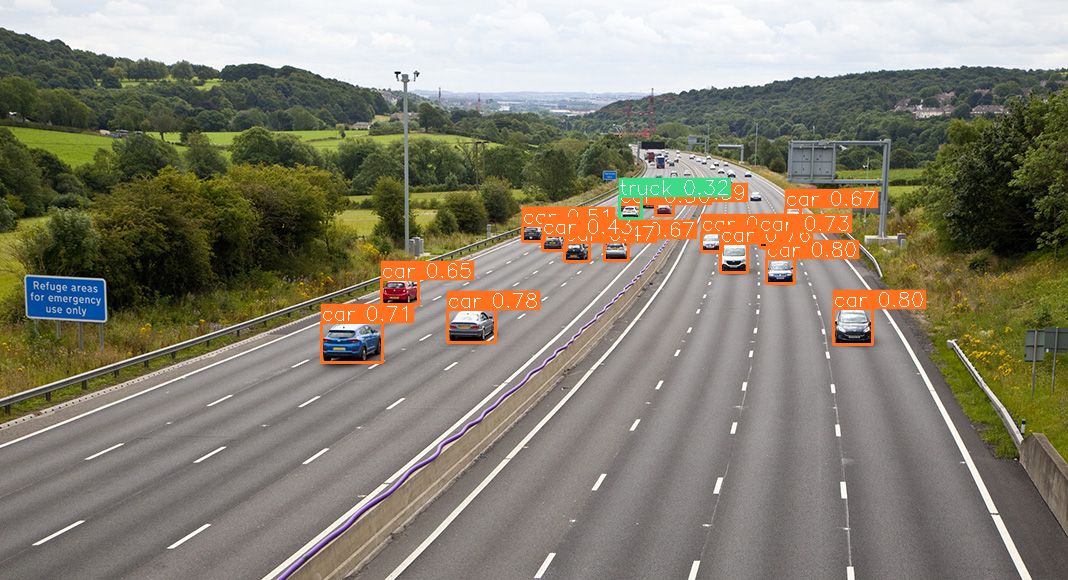

In [4]:
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

In [5]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

Performing prediction on 15 number of slices.


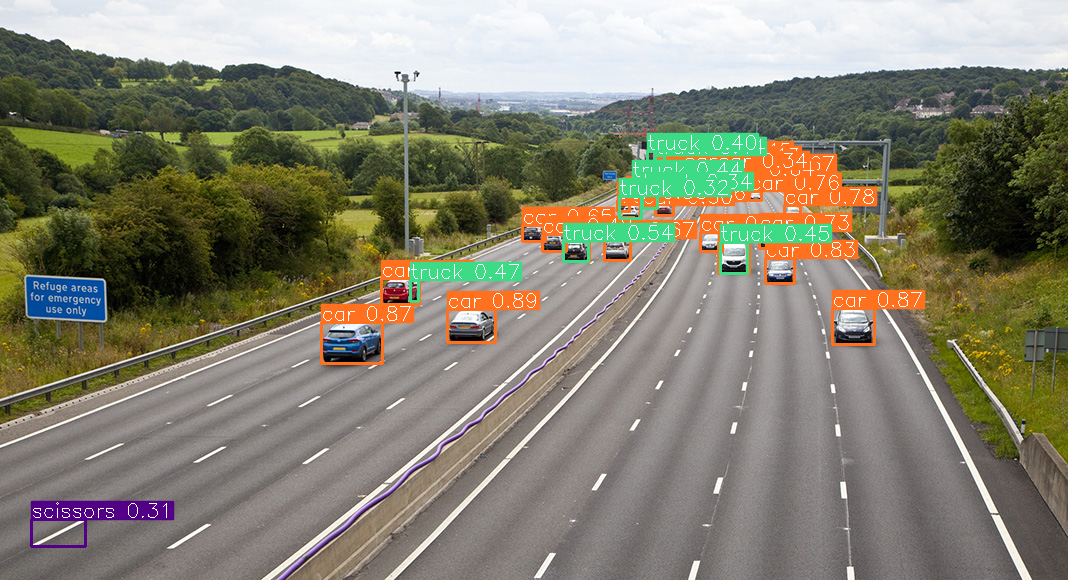

In [6]:
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")

In [14]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path='/home/vlad/projects/drons_vs_berds/train/yolo/best.pt',
    confidence_threshold=0.5,
    device="cpu",  # or 'cuda:0'
)

Performing prediction on 15 number of slices.


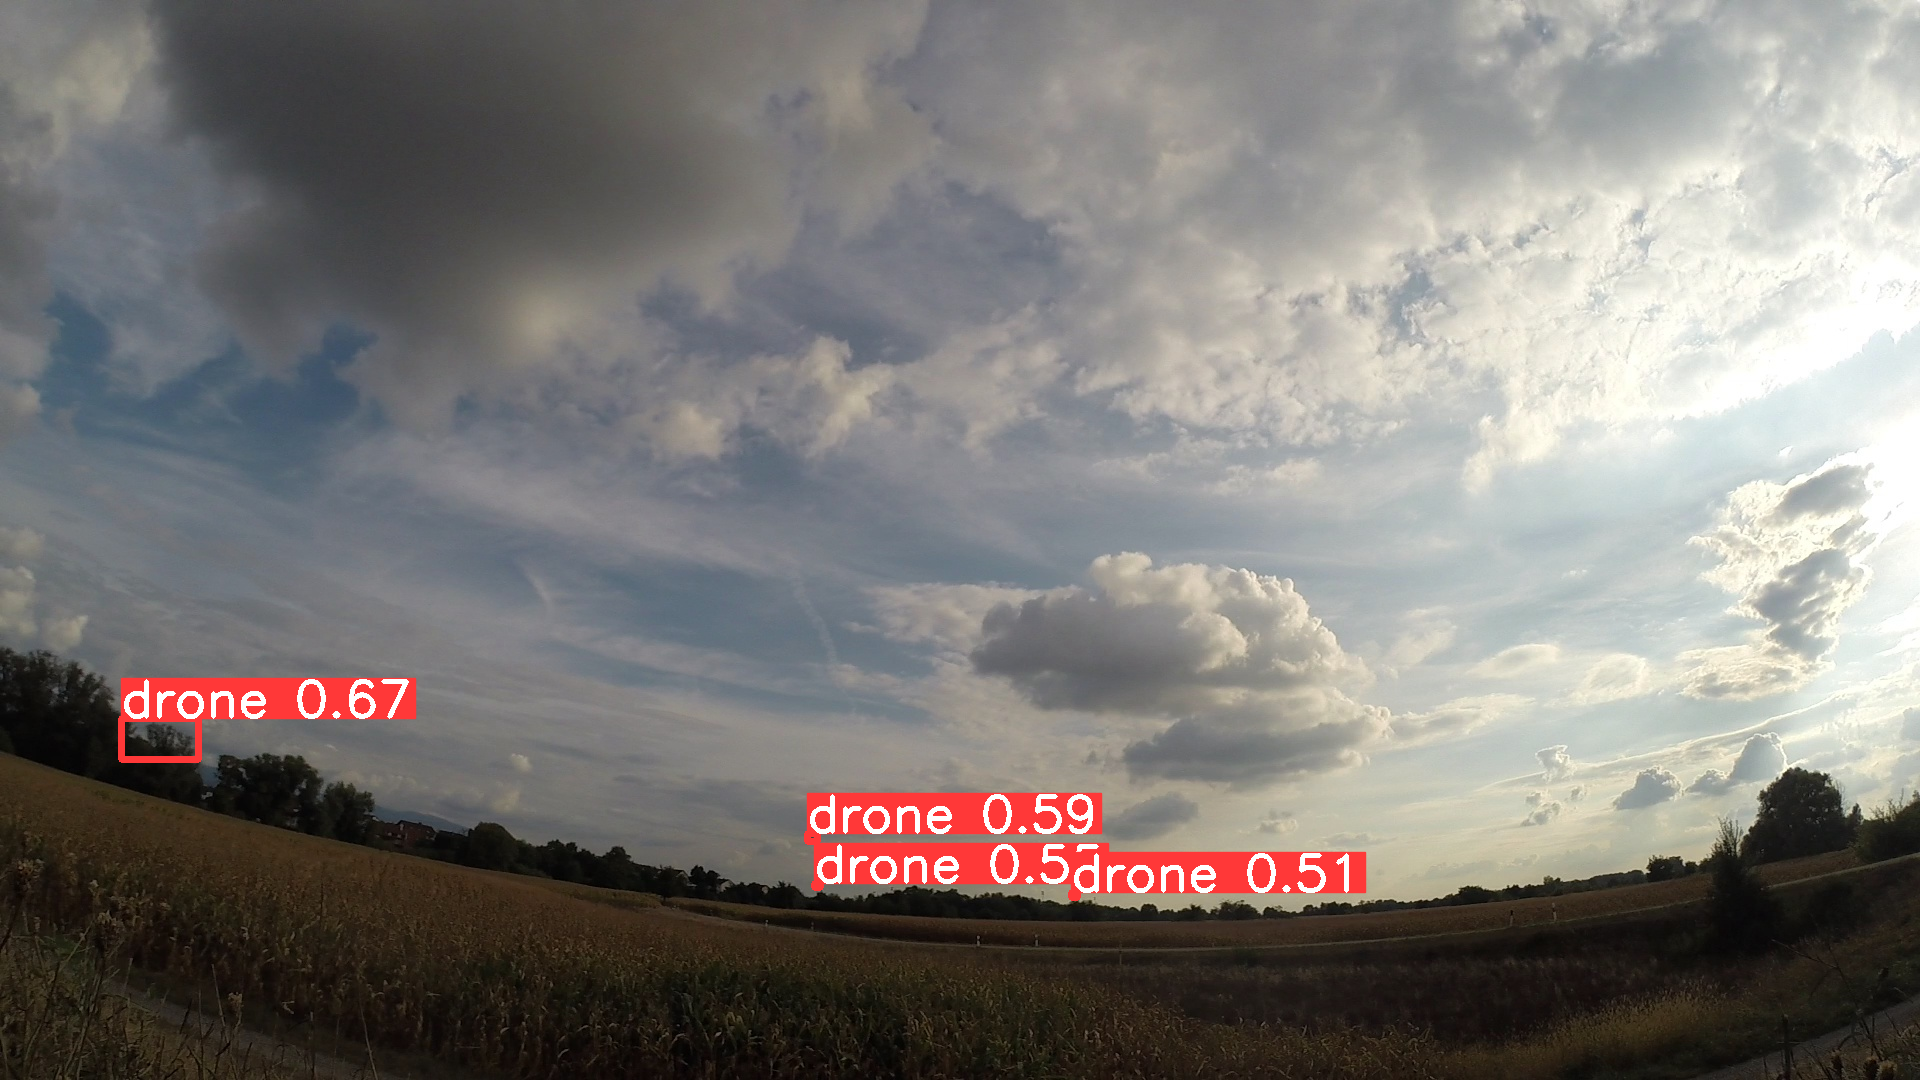

In [27]:
result = get_sliced_prediction(
    "/home/vlad/datasets/drons_vs_berds/images/GOPR5845_001/0196.jpg",
    detection_model,
    slice_height=512,
    slice_width=512,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)  
result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png")  

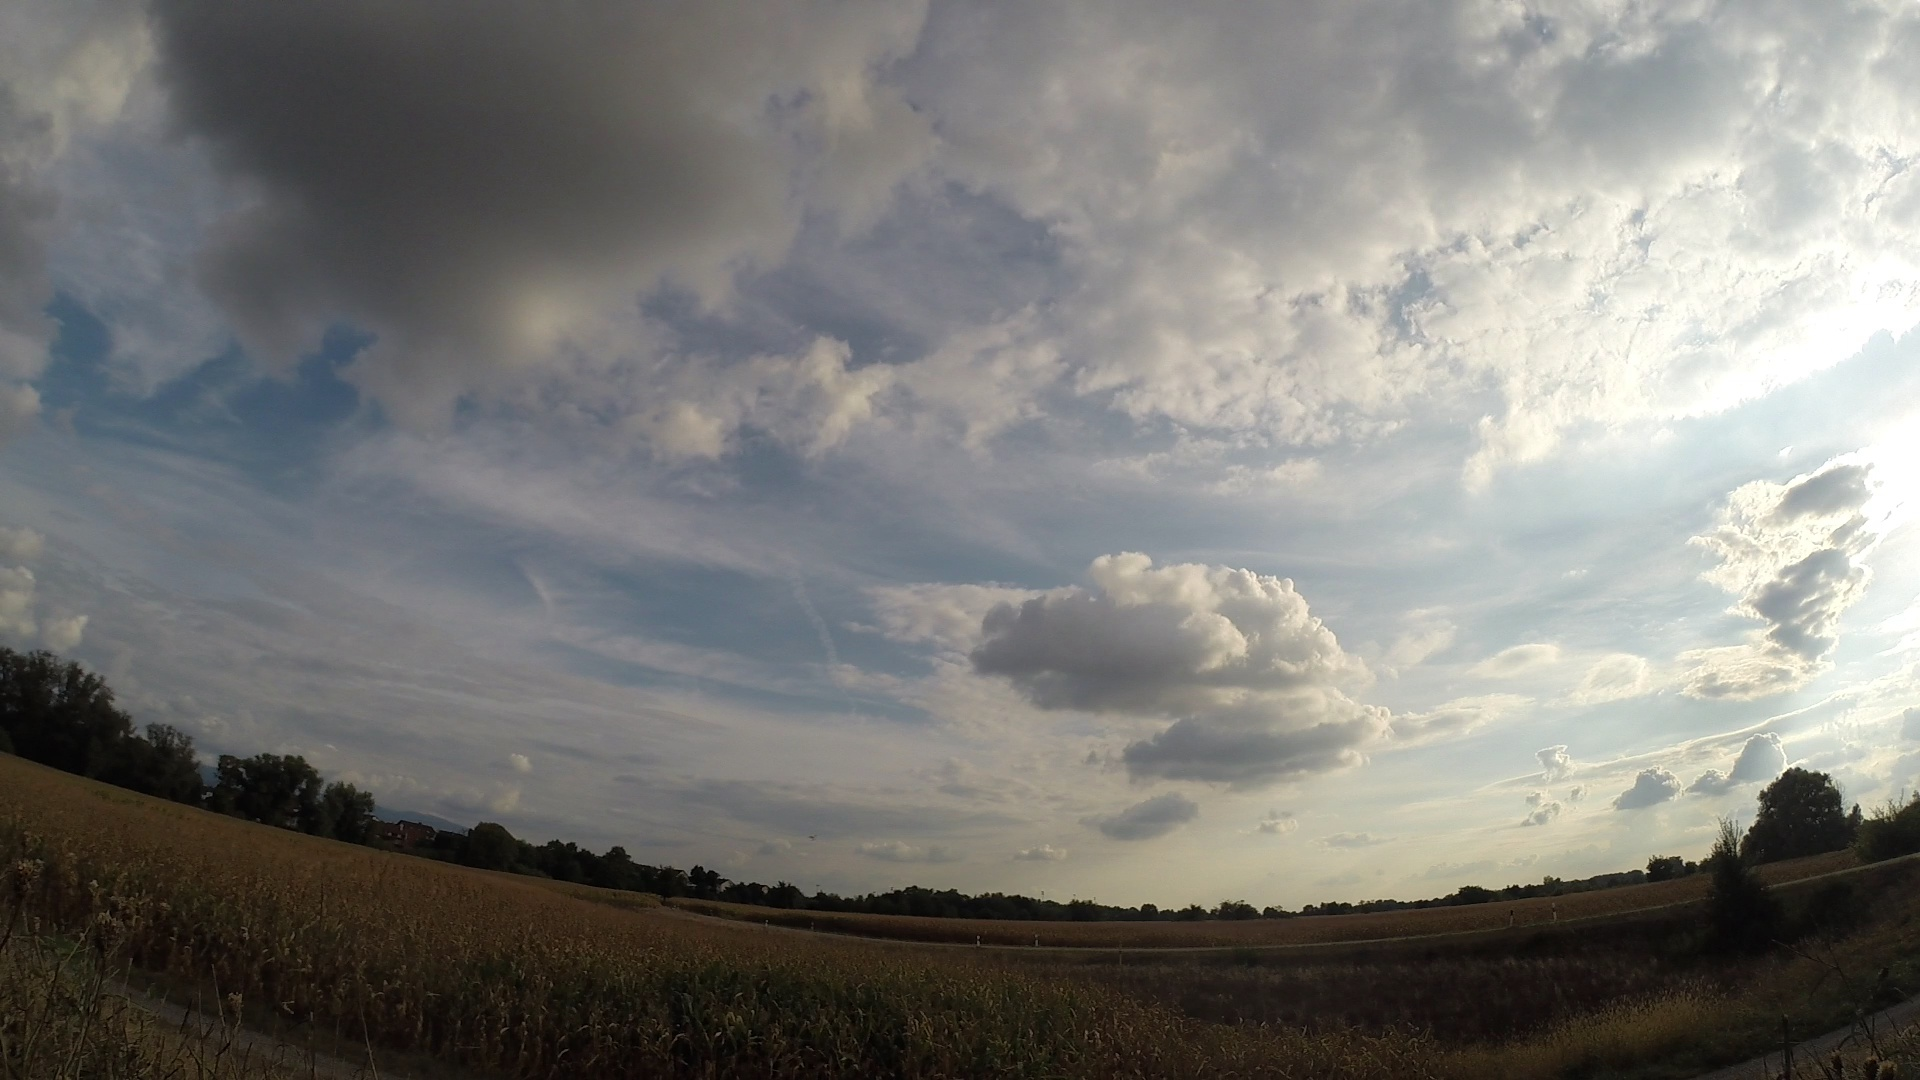

In [26]:
result = get_prediction("/home/vlad/datasets/drons_vs_berds/images/GOPR5845_001/0196.jpg", detection_model)

result.export_visuals(export_dir="demo_data/")
Image("demo_data/prediction_visual.png") 

In [2]:
!python evaluate_sahi_yolov8.py --model_path "./yolo8n_slice_640.pt" --coco_json "/home/vlad/datasets/drons_vs_berds/coco/dataset/drons_vs_berds_test.json" --image_dir "/home/vlad/datasets/drons_vs_berds/images"

indexing coco dataset annotations...
Loading coco annotations: 100%|██████████| 3116/3116 [00:00<00:00, 15568.84it/s]
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Progress of predictions: 100%|██████████████| 3116/3116 [08:11<00:00,  6.34it/s]
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.24s).
Accumulating evaluation results...
DONE (t=0.12s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.164
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.371
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.126
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.128
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.223
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.573
 Average Recall     (AR) @